In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
plugndrive_vehicles = pd.read_csv('cleaned_plugndrive_vehicles_data.csv')
kijiji_data = pd.read_csv('cleaned_kijiji_electric_car_listings.csv')
charger_data = pd.read_csv('cleaned_plugndrive_chargers_data.csv')

In [5]:
plugndrive_vehicles.head()

,handle,make,model,trim,fuel,msrp,doors,horsepower,acceleration,model_year,...,total_range,electric_efficiency,gvwr,curb_weight,display_name,drivetrain,fossil_fuel_efficiency,locally_available,plug_types,towing_capacity
0,Acura_ZDX_A-Spec_AWD_BEV_2024_CA,Acura,ZDX,A-Spec,BEV,84990,4,490,5.5,2024,...,489,24.0,NaN,2678.0,ZDX A-Spec,All-Wheel Drive,NaN,1,"['CCS1', 'J1772']",NaN
1,Acura_ZDX_Type_S_BEV_2024_CA,Acura,ZDX,Type S,BEV,91490,4,500,5.0,2024,...,447,27.0,NaN,2169.0,ZDX Type S,All-Wheel Drive,NaN,1,"['CCS1', 'J1772']",NaN
2,Alfa_Romeo_Tonale_PHEV_2024_CA,Alfa Romeo,Tonale,Sprint PHEV,PHEV,54865,4,285,6.0,2024,...,573,27.0,2419.0,1875.0,Tonale Sprint PHEV,All-Wheel Drive,8.0,1,['J1772'],NaN
3,Alfa_Romeo_Tonale_Veloce_PHEV_2024_CA,Alfa Romeo,Tonale,Veloce PHEV,PHEV,63290,4,285,6.2,2024,...,573,27.0,2419.0,2004.0,Tonale Veloce PHEV,All-Wheel Drive,8.0,1,['J1772'],NaN
4,Audi_e-tron_GT_BEV_2024_CA,Audi,e-tron GT,quattro,BEV,134315,4,523,4.1,2024,...,399,25.0,2840.0,2295.0,e-tron GT quattro,All-Wheel Drive,0.0,1,"['CCS1', 'J1772']",NaN


In [6]:
kijiji_data.head()

,title,price,mileage,transmission,location,year,brand,model,price_clean,mileage_clean,year_clean
0,2017 Kia Soul EV Plug In Electric,"$16,499","13,359 km",Automatic,Brantford,2017,Kia,Soul EV,16499.0,13359.0,2017.0
1,2021 Porsche Taycan Tech|Premium|Off-Road Design,"$109,998","19,970 km",Automatic,London,2021,Porsche,Taycan Tech|Premium|Off-Road,109998.0,19970.0,2021.0
2,"2023 Chevrolet Bolt EUV LT rue North, Leather,...","$32,988","20,913 km",Automatic,Guelph,2023,Chevrolet,Bolt EUV,32988.0,20913.0,2023.0
3,2024 Hyundai IONIQ 5 Preferred | AWD | LANE KE...,Please Contact,12 km,Automatic,Sherwood Park,2024,Hyundai,IONIQ 5,NaN,12.0,2024.0
4,2024 Audi Q4 e-tron,"$61,977","17,200 km",Automatic,Sherbrooke,2024,Audi,Q4 e-tron,61977.0,17200.0,2024.0


In [7]:
charger_data.head()

,model,make,model_variant,price,amps,form_factor,cord_length,home_outlet,plug_types,wifi,warranty,safe_outdoors,made_in_america,has_discount,certifications,volts_ac,kw_ac
0,HCS-40,Enphase,NaN,732,32.0,Wall mounted,25,Hardwired,J1772,False,3,True,True,False,"cETL, Energy Star, ETL",240.0,7.7
1,HCS-40,Enphase,P,648,32.0,Wall mounted,25,"6-50,14-50",J1772,False,3,True,True,False,"cETL, Energy Star, ETL",240.0,7.7
2,LCS-20,Enphase,P,336,16.0,Wall mounted,25,"6-50, 14-30, 14-50",J1772,False,3,True,True,False,"cETL, cUL, Energy Star, ETL, UL",240.0,3.8
3,HCS-50,Enphase,NaN,809,40.0,Wall mounted,25,Hardwired,J1772,False,3,True,True,False,"cETL, Energy Star, ETL",240.0,9.6
4,HCS-60,Enphase,NaN,1099,48.0,Wall mounted,25,Hardwired,J1772,False,3,True,True,False,"cETL, Energy Star, ETL",240.0,11.5


In [8]:
# Set the style for all plots
plt.style.use('default')
# Set color palette
sns.set_palette("husl")

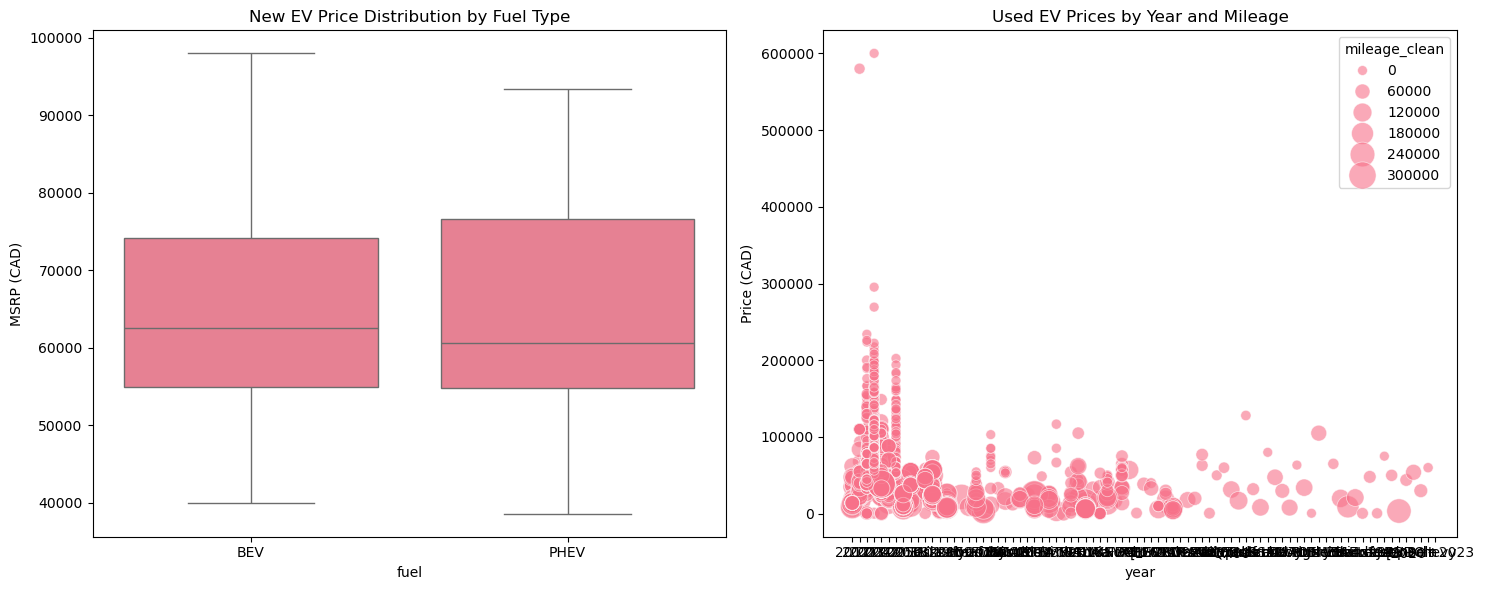

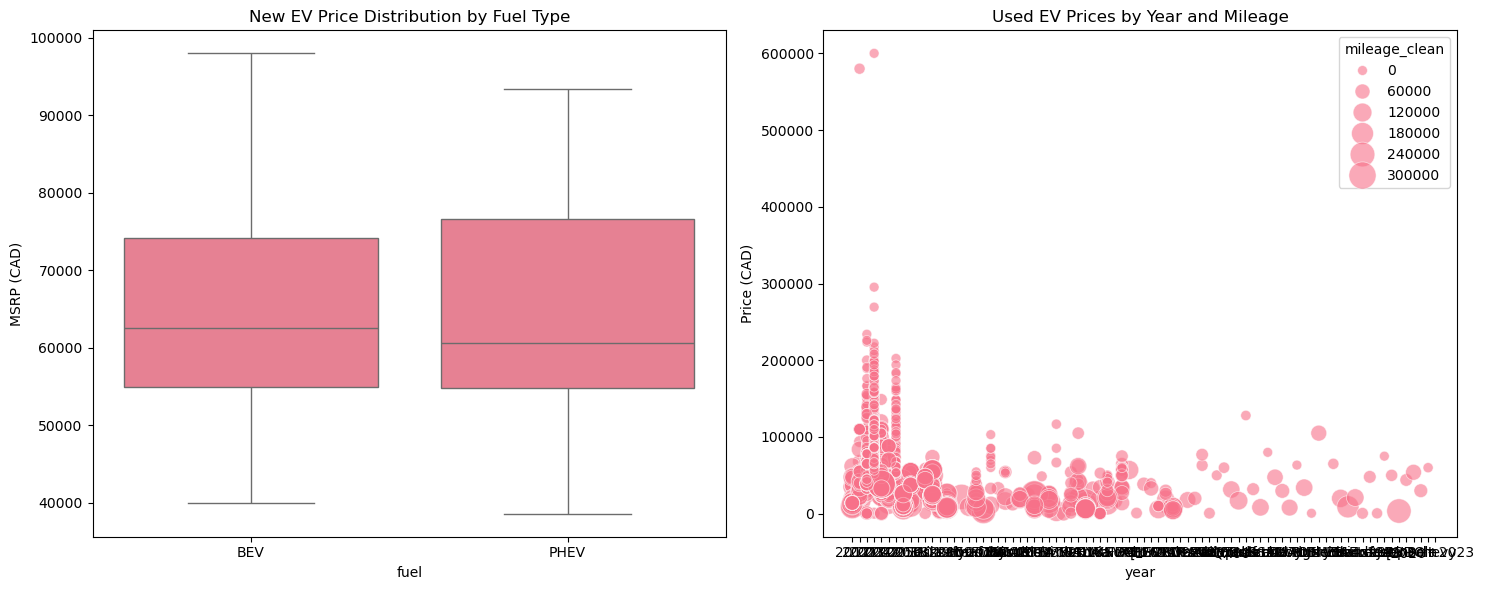

In [9]:
def plot_price_distribution():
    """
    Research Question 1: What are the key factors contributing to the high cost of EV ownership?
    Analyzing new vs used EV price distributions
    """
    fig = plt.figure(figsize=(15, 6))

    # New vehicles price distribution
    ax1 = plt.subplot(1, 2, 1)
    data = plugndrive_vehicles[plugndrive_vehicles['msrp'] < 100000]
    sns.boxplot(data=data, y='msrp', x='fuel', ax=ax1)
    ax1.set_title('New EV Price Distribution by Fuel Type')
    ax1.set_ylabel('MSRP (CAD)')

    # Used vehicles price distribution
    ax2 = plt.subplot(1, 2, 2)
    sns.scatterplot(data=kijiji_data,
                    x='year',
                    y='price_clean',
                    size='mileage_clean',
                    sizes=(50, 400),
                    alpha=0.6,
                    ax=ax2)
    ax2.set_title('Used EV Prices by Year and Mileage')
    ax2.set_ylabel('Price (CAD)')

    plt.tight_layout()
    return fig

plot_price_distribution()

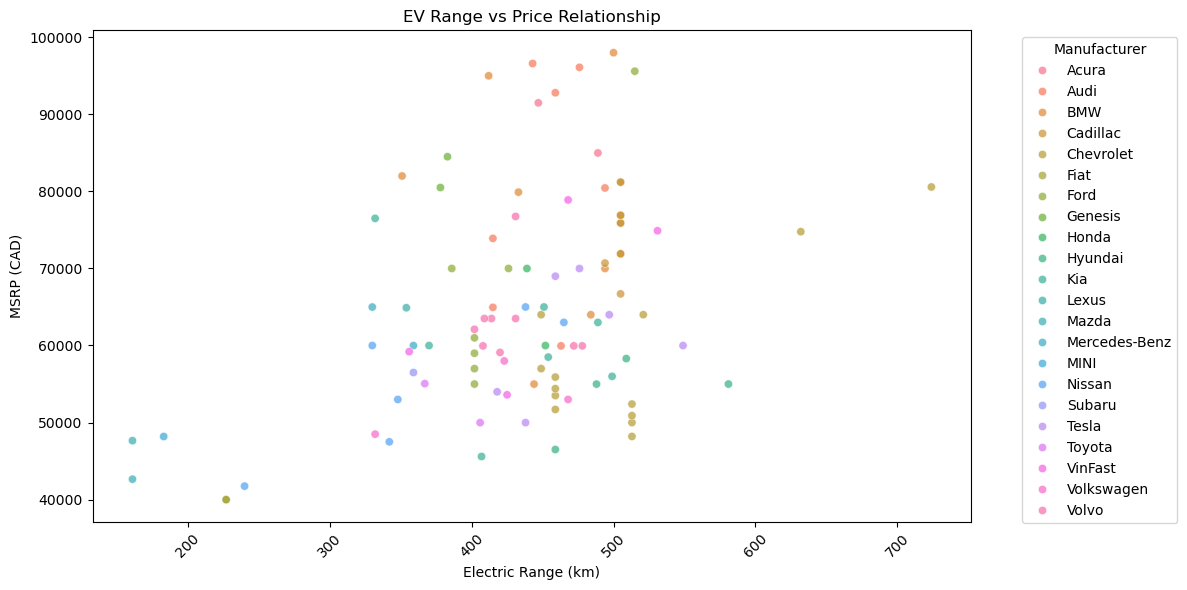

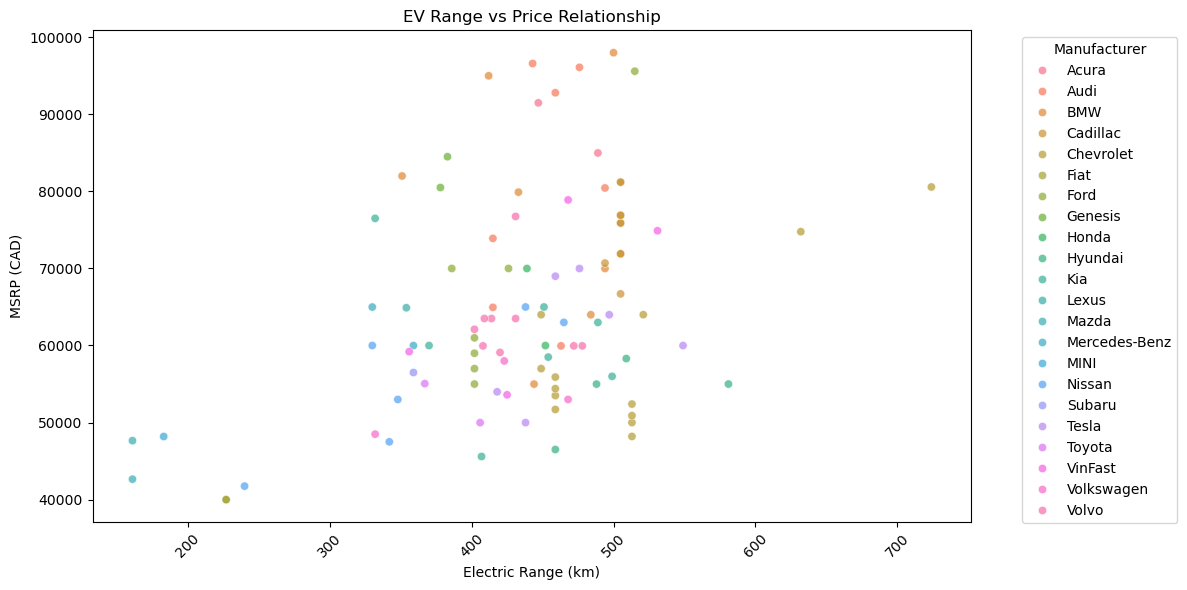

In [10]:
def plot_range_price_relationship():
    """
    Analyzing the relationship between range and price
    """
    fig = plt.figure(figsize=(12, 6))

    # Filter for BEVs only and remove extreme prices
    bev_data = plugndrive_vehicles[
        (plugndrive_vehicles['fuel'] == 'BEV') &
        (plugndrive_vehicles['msrp'] < 100000)
        ]

    sns.scatterplot(data=bev_data,
                    x='electric_range',
                    y='msrp',
                    hue='make',
                    alpha=0.7)

    plt.title('EV Range vs Price Relationship')
    plt.xlabel('Electric Range (km)')
    plt.ylabel('MSRP (CAD)')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Manufacturer')
    plt.tight_layout()
    return fig

plot_range_price_relationship()

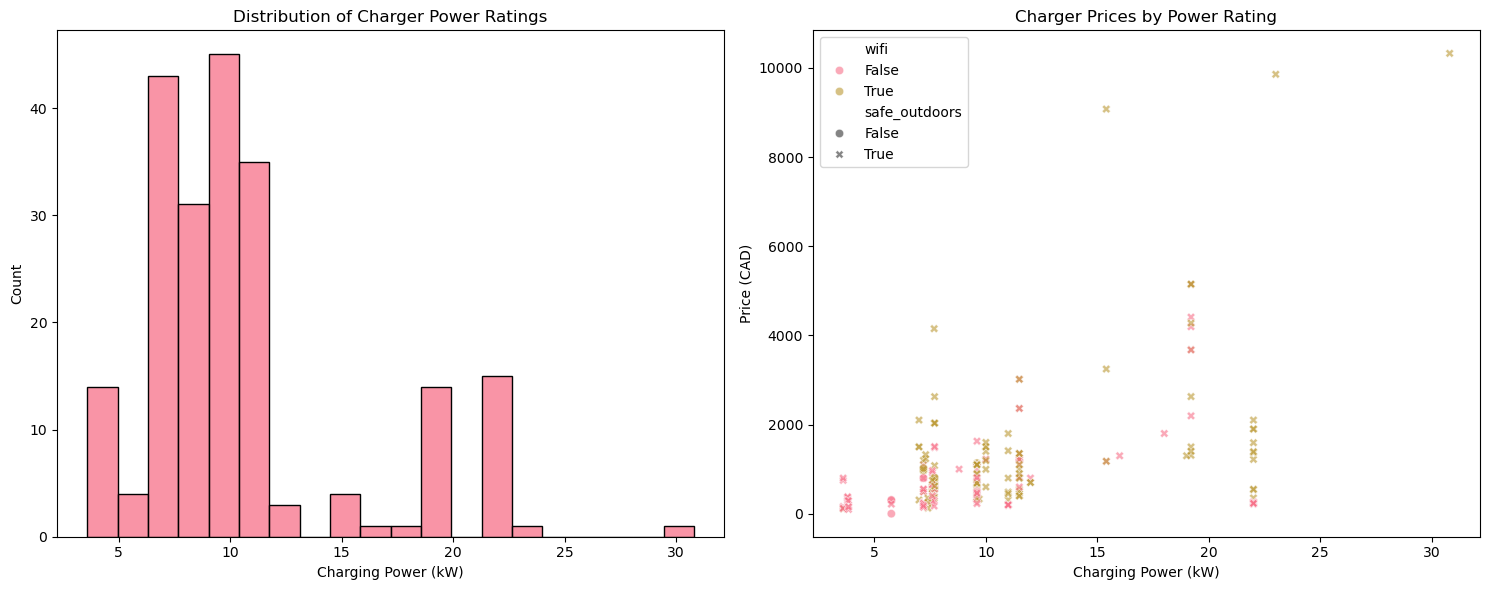

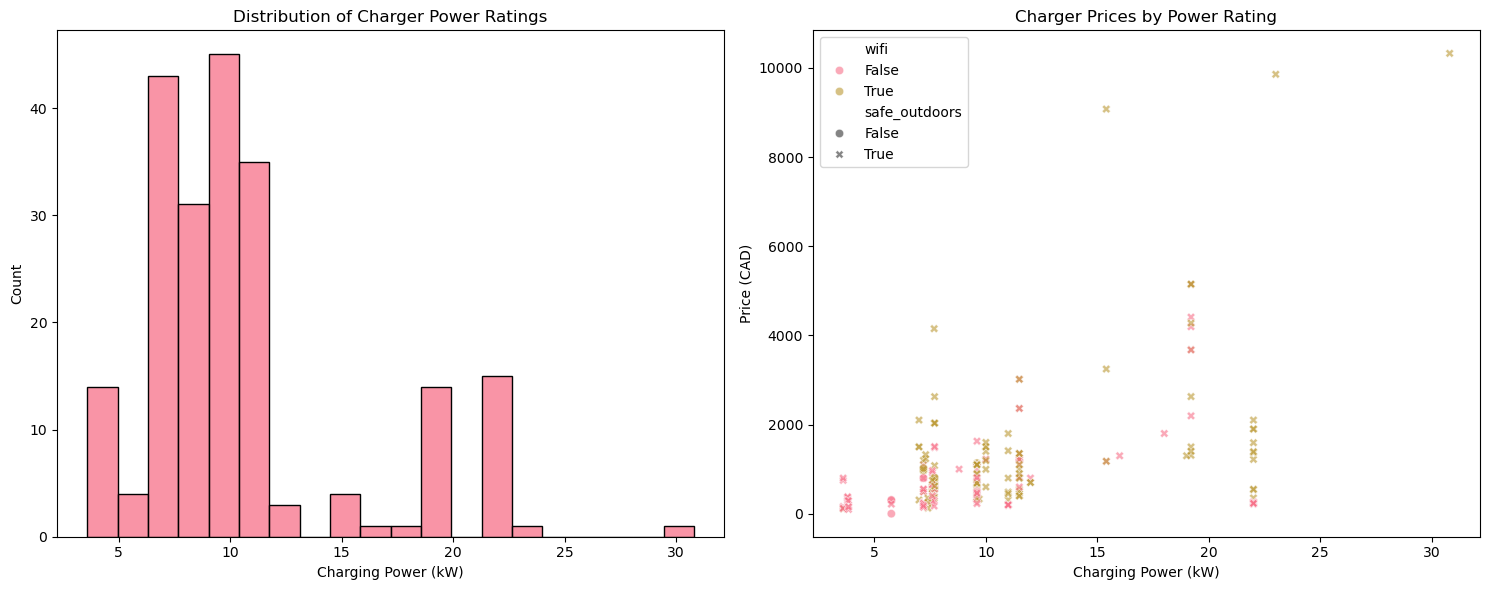

In [11]:
def plot_charging_infrastructure():
    """
    Research Question 2: How does the current charging infrastructure affect EV practicality?
    Analyzing charging capabilities and costs
    """
    fig = plt.figure(figsize=(15, 6))

    # Charging power distribution
    ax1 = plt.subplot(1, 2, 1)
    sns.histplot(data=charger_data, x='kw_ac', bins=20, ax=ax1)
    ax1.set_title('Distribution of Charger Power Ratings')
    ax1.set_xlabel('Charging Power (kW)')

    # Charger prices by power rating
    ax2 = plt.subplot(1, 2, 2)
    sns.scatterplot(data=charger_data,
                    x='kw_ac',
                    y='price',
                    hue='wifi',
                    style='safe_outdoors',
                    alpha=0.6,
                    ax=ax2)
    ax2.set_title('Charger Prices by Power Rating')
    ax2.set_xlabel('Charging Power (kW)')
    ax2.set_ylabel('Price (CAD)')

    plt.tight_layout()
    return fig

plot_charging_infrastructure()

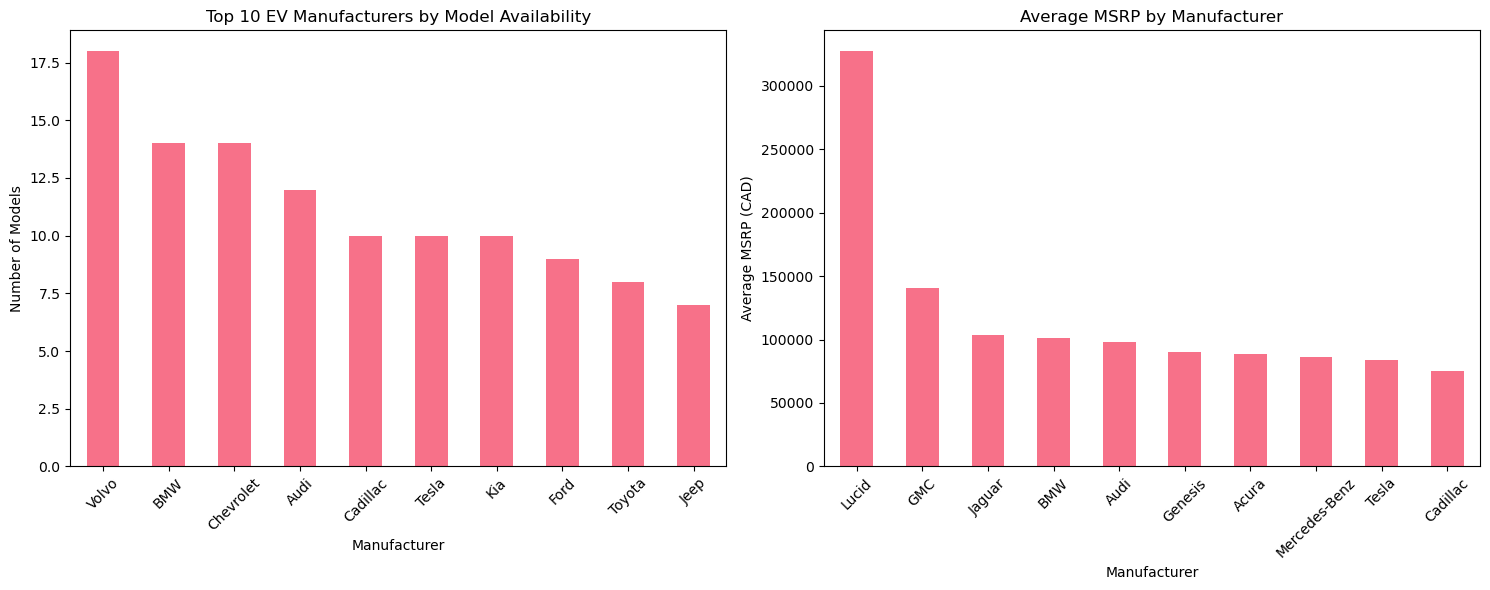

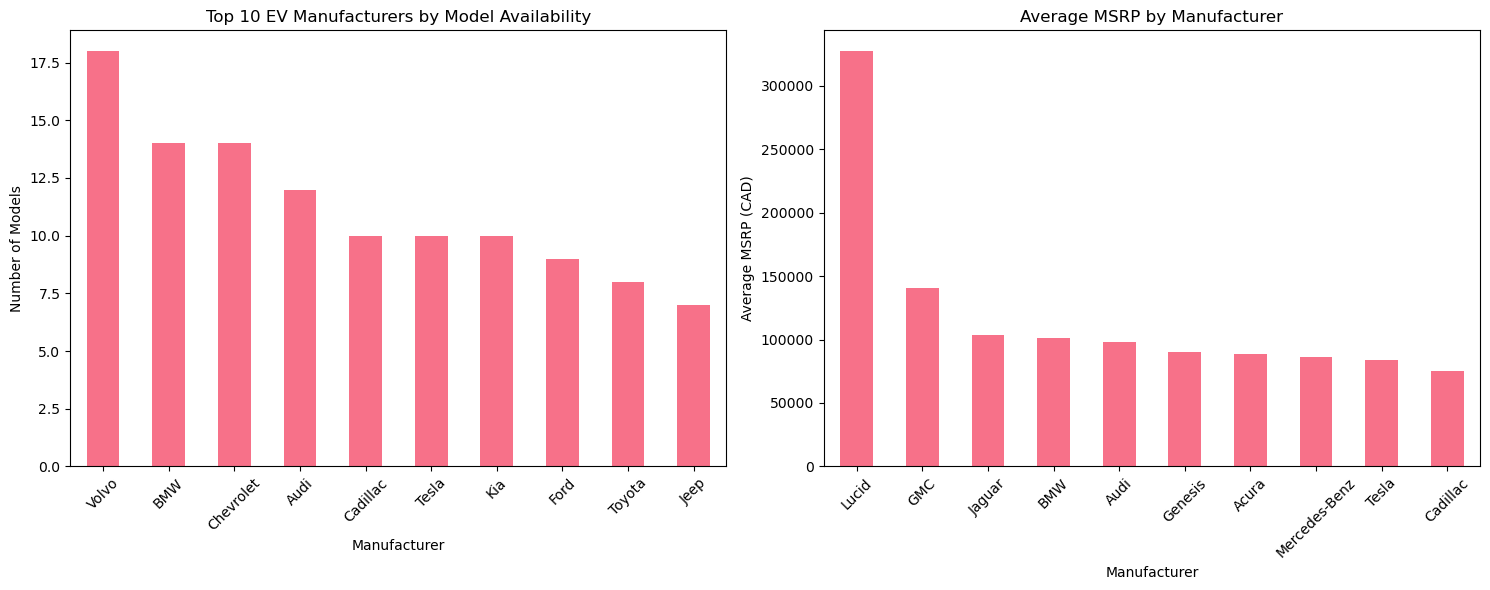

In [12]:
def plot_adoption_trends():
    """
    Analyzing vehicle availability and market trends
    """
    fig = plt.figure(figsize=(15, 6))

    # Count of vehicles by manufacturer
    ax1 = plt.subplot(1, 2, 1)
    make_counts = plugndrive_vehicles['make'].value_counts().head(10)
    make_counts.plot(kind='bar', ax=ax1)
    ax1.set_title('Top 10 EV Manufacturers by Model Availability')
    ax1.set_xlabel('Manufacturer')
    ax1.set_ylabel('Number of Models')
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    # Average price by manufacturer
    ax2 = plt.subplot(1, 2, 2)
    avg_price = plugndrive_vehicles.groupby('make')['msrp'].mean().sort_values(ascending=False).head(10)
    avg_price.plot(kind='bar', ax=ax2)
    ax2.set_title('Average MSRP by Manufacturer')
    ax2.set_xlabel('Manufacturer')
    ax2.set_ylabel('Average MSRP (CAD)')
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

    plt.tight_layout()
    return fig

plot_adoption_trends()

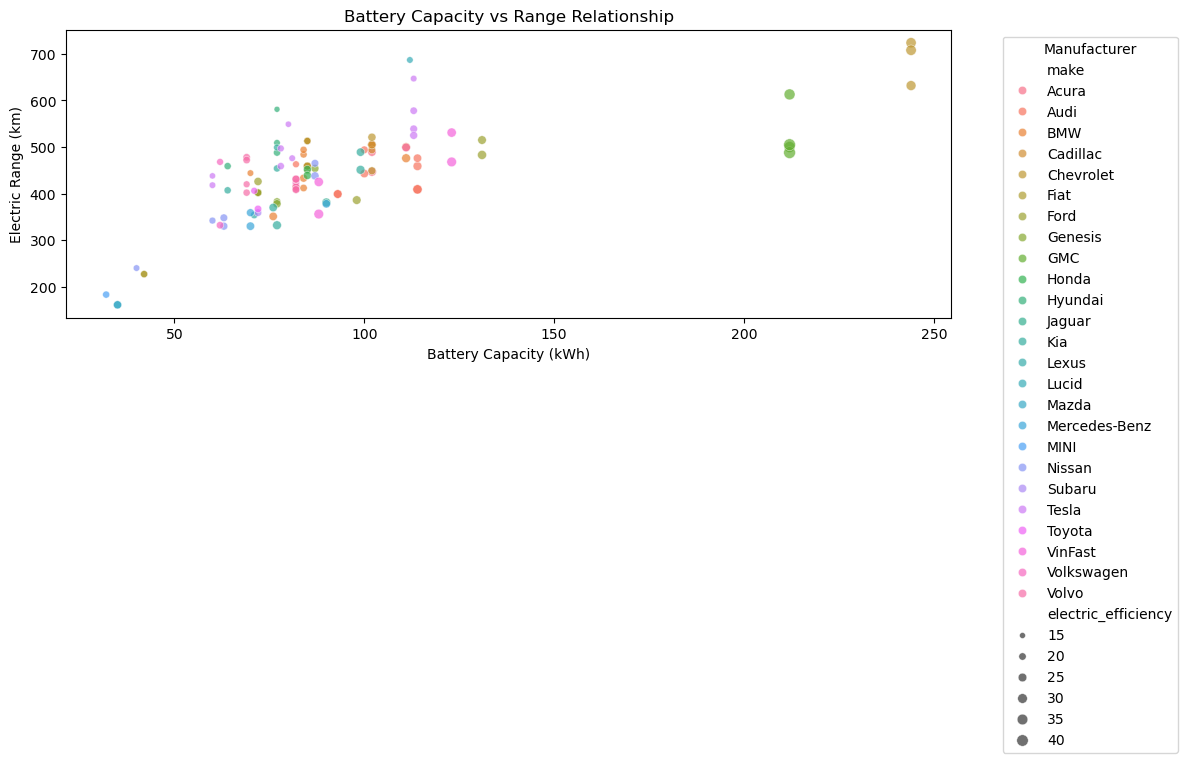

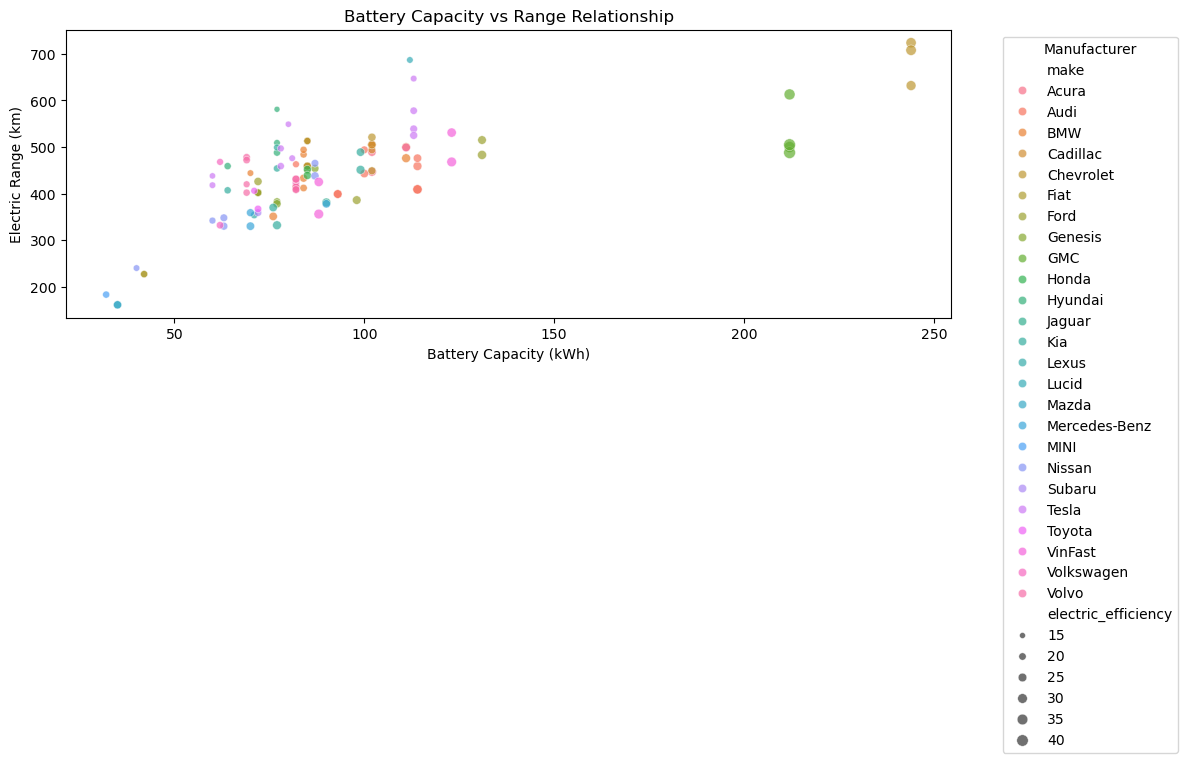

In [13]:
def plot_vehicle_efficiency():
    """
    Analyzing vehicle efficiency and performance metrics
    """
    fig = plt.figure(figsize=(12, 6))

    # Filter BEVs only
    bev_data = plugndrive_vehicles[plugndrive_vehicles['fuel'] == 'BEV']

    sns.scatterplot(data=bev_data,
                    x='battery_capacity',
                    y='electric_range',
                    size='electric_efficiency',
                    hue='make',
                    alpha=0.7)

    plt.title('Battery Capacity vs Range Relationship')
    plt.xlabel('Battery Capacity (kWh)')
    plt.ylabel('Electric Range (km)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Manufacturer')
    plt.tight_layout()
    return fig

plot_vehicle_efficiency()

In [14]:
# Create and save all plots
figures = [
    plot_price_distribution(),
    plot_range_price_relationship(),
    plot_charging_infrastructure(),
    plot_adoption_trends(),
    plot_vehicle_efficiency()
]

# Save all figures
for i, fig in enumerate(figures, 1):
    fig.savefig(f'ev_analysis_figure_{i}.png', dpi=300, bbox_inches='tight')
    plt.close(fig)

print("All figures have been generated and saved.")

All figures have been generated and saved.
